In [86]:
import glob
import iris
import iris.coord_categorisation
from iris.experimental.equalise_cubes import equalise_attributes
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt

In [87]:
%matplotlib inline

### Read data

In [88]:
control_files = glob.glob('/g/data/ua6/drstree/CMIP5/GCM/NCC/NorESM1-M/piControl/mon/ocean/thetao/r1i1p1/*.nc')
dedrifted_ghg_files = glob.glob('/g/data/r87/dbi599/drstree/CMIP5/GCM/NCC/NorESM1-M/historicalGHG/yr/ocean/thetao/r1i1p1/dedrifted/thetao_Oyr_NorESM1-M_historicalGHG_r1i1p1_*.nc')
ghg_files = glob.glob('/g/data/r87/dbi599/drstree/CMIP5/GCM/NCC/NorESM1-M/historicalGHG/yr/ocean/thetao/r1i1p1/thetao_Oyr_NorESM1-M_historicalGHG_r1i1p1_*.nc')

coefficient_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/NCC/NorESM1-M/piControl/yr/ocean/thetao/r1i1p1/thetao-coefficients_Oyr_NorESM1-M_piControl_r1i1p1_all.nc'

dedrifted_climatology_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/NCC/NorESM1-M/historicalGHG/yr/ocean/thetao/r1i1p1/dedrifted/thetao-clim_Oyr_NorESM1-M_historicalGHG_r1i1p1_all.nc'
climatology_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/NCC/NorESM1-M/historicalGHG/yr/ocean/thetao/r1i1p1/thetao-clim_Oyr_NorESM1-M_historicalGHG_r1i1p1_all.nc'

In [89]:
iris.FUTURE.netcdf_promote=True

In [90]:
# control data
control_list = iris.load(control_files, 'sea_water_potential_temperature')
iris.util.unify_time_units(control_list)
equalise_attributes(control_list)
control_cube = control_list.concatenate_cube()

In [91]:
# GHG data
ghg_list = iris.load(ghg_files, 'sea_water_potential_temperature')
iris.util.unify_time_units(ghg_list)
equalise_attributes(ghg_list)
ghg_cube = ghg_list.concatenate_cube()

# dedrifted GHG data
dedrifted_ghg_list = iris.load(dedrifted_ghg_files, 'sea_water_potential_temperature')
iris.util.unify_time_units(dedrifted_ghg_list)
equalise_attributes(dedrifted_ghg_list)
dedrifted_ghg_cube = dedrifted_ghg_list.concatenate_cube()

In [92]:
# coefficient data
coefficient_cube = iris.load_cube(coefficient_file)

In [93]:
# climatology data
dedrifted_climatology_cube = iris.load_cube(dedrifted_climatology_file)
climatology_cube = iris.load_cube(climatology_file)

In [94]:
print climatology_cube

sea_water_potential_temperature / (K) (depth: 70; cell index along second dimension: 384; cell index along first dimension: 320)
     Dimension coordinates:
          depth                             x                                      -                                      -
          cell index along second dimension -                                      x                                      -
          cell index along first dimension  -                                      -                                      x
     Auxiliary coordinates:
          latitude                          -                                      x                                      x
          longitude                         -                                      x                                      x
     Scalar coordinates:
          time: 1931-07-02 12:00:00, bound=(1850-01-01 00:00:00, 2013-01-01 00:00:00)
     Attributes:
          Conventions: CF-1.5
          associated_files: baseURL: 

In [95]:
print coefficient_cube

sea_water_potential_temperature / (K) (drift coefficient: 4; depth: 70; cell index along second dimension: 384; cell index along first dimension: 320)
     Dimension coordinates:
          drift coefficient                             x         -                                      -                                      -
          depth                                         -         x                                      -                                      -
          cell index along second dimension             -         -                                      x                                      -
          cell index along first dimension              -         -                                      -                                      x
     Auxiliary coordinates:
          latitude                                      -         -                                      x                                      x
          longitude                                     -      

### Plot

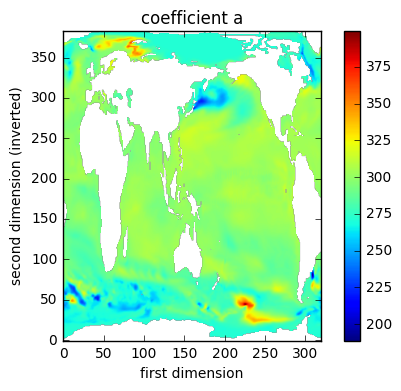

In [96]:
plt.imshow(coefficient_cube[0, 0, ::].data)
plt.gca().invert_yaxis()
plt.title('coefficient a')
plt.colorbar()
plt.ylabel('second dimension (inverted)')
plt.xlabel('first dimension')
plt.show()

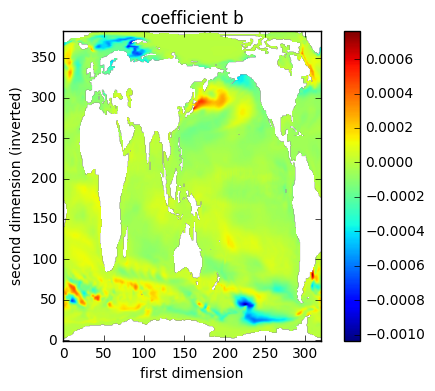

In [97]:
plt.imshow(coefficient_cube[1, 0, ::].data)
plt.gca().invert_yaxis()
plt.title('coefficient b')
plt.colorbar()
plt.ylabel('second dimension (inverted)')
plt.xlabel('first dimension')
plt.show()

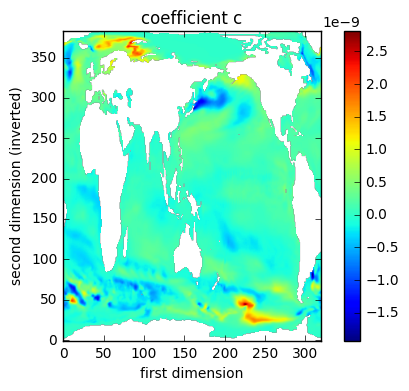

In [98]:
plt.imshow(coefficient_cube[2, 0, ::].data)
plt.gca().invert_yaxis()
plt.title('coefficient c')
plt.colorbar()
plt.ylabel('second dimension (inverted)')
plt.xlabel('first dimension')
plt.show()

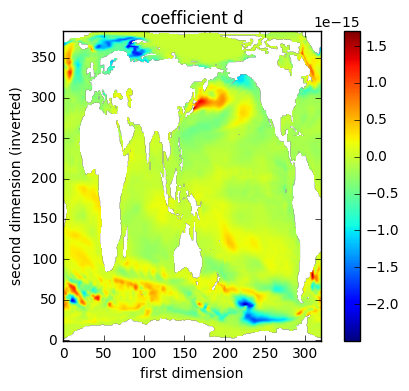

In [99]:
plt.imshow(coefficient_cube[3, 0, ::].data)
plt.gca().invert_yaxis()
plt.title('coefficient d')
plt.colorbar()
plt.ylabel('second dimension (inverted)')
plt.xlabel('first dimension')
plt.show()

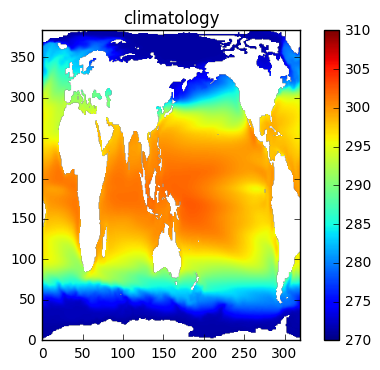

In [100]:
plt.imshow(climatology_cube[0, ::].data, vmin=270, vmax=310)
plt.gca().invert_yaxis()
plt.title('climatology')
plt.colorbar()
plt.show()

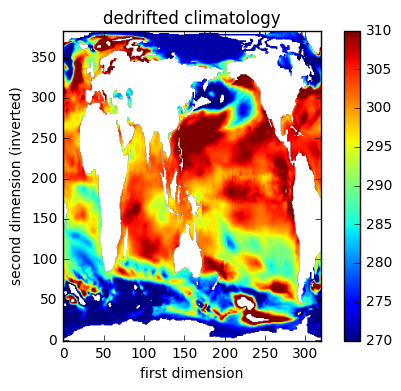

In [101]:
plt.imshow(dedrifted_climatology_cube[0, ::].data, vmin=270, vmax=310)
plt.gca().invert_yaxis()
plt.title('dedrifted climatology')
plt.colorbar()
plt.ylabel('second dimension (inverted)')
plt.xlabel('first dimension')
plt.show()

In [102]:
def convert_to_annual(cube):
    """Convert data to annual timescale.

    Args:
      cube (iris.cube.Cube)
    
    """

    iris.coord_categorisation.add_year(cube, 'time')
    cube = cube.aggregated_by(['year'], iris.analysis.MEAN)
    cube.remove_coord('year')

    return cube

299.384
1.87938e-05
-6.1628e-11
6.49088e-17


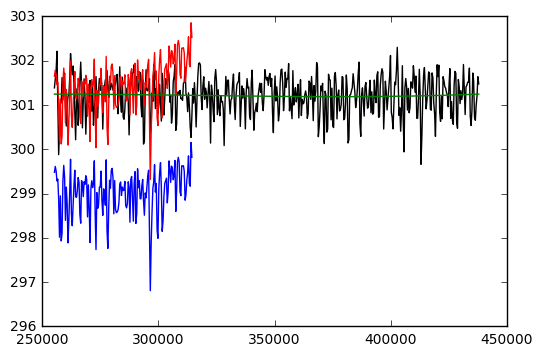

In [114]:
second_dim = 200  # of 384
first_dim = 200 # of 320

control_subset = control_cube[:, 0, second_dim, first_dim]
control_subset = convert_to_annual(control_subset)

ghg_subset = ghg_cube[:, 0, second_dim, first_dim]
ghg_subset = convert_to_annual(ghg_subset)

dedrifted_ghg_subset = dedrifted_ghg_cube[:, 0, second_dim, first_dim]
dedrifted_ghg_subset = convert_to_annual(dedrifted_ghg_subset)

len_ghg  =len(ghg_subset.data)
x = control_subset.coord('time').points

a, b, c, d = coefficient_cube[:, 0, second_dim, first_dim].data
print a
print b
print c
print d

drift = a + b*x + c*x**2 + d*x**3

plt.plot(x, control_subset.data, color='black')
plt.plot(x[0:len_ghg], ghg_subset.data, color='r')
plt.plot(x[0:len_ghg], dedrifted_ghg_subset.data, color='b')

plt.plot(x, drift, color='g')
plt.show()